In [6]:
import pandas as pd
import numpy as np

ModuleNotFoundError: No module named 'pandas'

## Importing datasets and checking structure

In [ ]:
# uploading datasets
players = pd.read_csv("data/players.csv")
teams = pd.read_csv("data/teams.csv")
players_data = pd.read_csv("data/player_data_per_36_min.csv")

In [ ]:
players.head(6)

,id,name,full_name,position,height,weight,birth_date,birth_place,retired,player_url,current_team_id,teams,text
0,1,Alaa Abdelnaby,Alaa Abdelnaby,F-C,6-10,240.0,June 24 1968,"Cairo, Egypt",True,/players/a/abdelal01.html,NaN,"[25, 2, 26, 17, 23]","Alaa Abdelnaby (Arabic: علاء عبد النبي‎, born ..."
1,2,Zaid Abdul-Aziz,Zaid Abdul-Aziz,C-F,6-9,235.0,April 7 1946,"Brooklyn, New York",True,/players/a/abdulza01.html,NaN,"[11, 17, 2]",Zaid Abdul-Aziz (born Donald A. Smith on April...
2,3,Kareem Abdul-Jabbar,Kareem Abdul-Jabbar,C,7-2,225.0,April 16 1947,"New York, New York",True,/players/a/abdulka01.html,NaN,"[14, 17]",Kareem Abdul-Jabbar (born Ferdinand Lewis Alci...
3,4,Mahmoud Abdul-Rauf,Mahmoud Abdul-Rauf,G,6-1,162.0,March 9 1969,"Gulfport, Mississippi",True,/players/a/abdulma02.html,NaN,"[8, 26]",Mahmoud Abdul-Rauf (born Chris Wayne Jackson o...
4,5,Tariq Abdul-Wahad,Tariq Abdul-Wahad,F,6-6,223.0,November 3 1974,"Maisons Alfort, France",True,/players/a/abdulta01.html,NaN,"[26, 8, 22, 7]",Tariq Abdul-Wahad (born Olivier Michael Saint-...
5,6,Shareef Abdur-Rahim,Julius Shareef Abdur-Rahim,F,6-9,225.0,December 11 1976,"Marietta, Georgia",True,/players/a/abdursh01.html,NaN,"[1, 26, 25]","Shareef Abdur-Rahim (born December 11, 1976) i..."


In [ ]:
players.shape

(4820, 13)

In [ ]:
players_data.head(6)

,id,player_id,season,total_games,games_started,minutes_played,fg,fga,fgp,fg3,...,ftp,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,1,134,1949-50,63.0,NaN,NaN,NaN,NaN,0.279,NaN,...,0.705,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,206,1949-50,49.0,NaN,NaN,NaN,NaN,0.372,NaN,...,0.708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,221,1949-50,67.0,NaN,NaN,NaN,NaN,0.349,NaN,...,0.698,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,235,1949-50,15.0,NaN,NaN,NaN,NaN,0.256,NaN,...,0.559,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,235,1949-50,13.0,NaN,NaN,NaN,NaN,0.256,NaN,...,0.548,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,235,1949-50,2.0,NaN,NaN,NaN,NaN,0.250,NaN,...,0.667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
players_data.shape

(26674, 27)

In [ ]:
teams.head(6)

,team_id,team_name,short_name,years,total_games,total_wins,total_losses,win_loss_percentage,champions,other_names,link,active
0,1,Atlanta Hawks,ATL,71,5609,2762,2847,0.492,1,"['Atlanta Hawks', 'St. Louis Hawks', 'Milwauke...",/teams/ATL/,True
1,2,Boston Celtics,BOS,74,5778,3416,2362,0.591,17,['Boston Celtics'],/teams/BOS/,True
2,3,Brooklyn Nets,NJN,53,4276,1849,2427,0.432,2,"['Brooklyn Nets', 'New Jersey Nets', 'New York...",/teams/NJN/,True
3,4,Charlotte Hornets,CHA,30,2385,1046,1339,0.439,0,"['Charlotte Hornets', 'Charlotte Bobcats', 'Ch...",/teams/CHA/,True
4,5,Chicago Bulls,CHI,54,4353,2224,2129,0.511,6,['Chicago Bulls'],/teams/CHI/,True
5,6,Cleveland Cavaliers,CLE,50,4024,1862,2162,0.463,1,['Cleveland Cavaliers'],/teams/CLE/,True


## Mergeing datasets

In [ ]:
# merging players.csv and player_data_per_36_min.csv (dataframes players and players_data)
players_merged = pd.merge(players, players_data, how='outer', left_on='id', right_on='player_id')

In [ ]:
# dictionary connecting team id with team name from df teams
team_id_to_name_mapping = dict(zip(teams['team_id'], teams['team_name']))

# mapping current_team_id from df players_merged with team_name from df teams by team_id 
players_merged['team_name'] = players_merged['current_team_id'].map(team_id_to_name_mapping)

## Data cleaning & creating grouped tables

In [ ]:
# checking the number of NaN in each column
players_merged = players_merged.replace(r'^s*$', np.nan, regex=True)
players_merged.isna().sum()

id_x                   0
name                   0
full_name              0
position               0
height                 0
weight                 5
birth_date            23
birth_place          531
retired                0
player_url             0
current_team_id    24362
teams                  0
text                   1
id_y                 520
player_id            520
season               520
total_games          549
games_started       6986
minutes_played      1073
fg                  1078
fga                 1078
fgp                  686
fg3                 6297
fg3a                6297
fg3p                9963
fg2                 4636
fg2a                4636
fg2p                4806
ft                  1078
fta                 1078
ftp                 1579
orb                 4427
drb                 4427
trb                 1086
ast                 1078
stl                 4427
blk                 4427
tov                 5579
pf                  1078
pts                 1078


There are no missing values in column team_name of df teams so we can be sure that the reason for a missing value in column team_name in df players_merged is because of the missing value in column current_team_id in df players_merged which means that the player is for sure retired. (The reason for a missing value in column team_name of df players_merged is not because of the missing value in column team_name of df teams) 

In [ ]:
# replacing missing values with 'Retired' in column team_name of df players_merged
players_merged['team_name'] = players_merged['team_name'].fillna('Retired')

Now we will delete all rows that have NaN value in column player_id, these rows aren't connected well because of the missing data in df players_data

In [ ]:
# deleting all rows that have NaN value in column player_id
players_merged = players_merged[players_merged['player_id'].notna()]

There are 5 instances with missing value in column 'weight'. We are going to replace each NaN value with median of all weight values.

In [ ]:
# calculating median of column weight
median_weight = players_merged['weight'].median()

#replacing all NaN values with median_weight
players_merged['weight'] = players_merged['weight'].fillna(median_weight)

Furthermore, we are going to replace all missing values in column 'current_team_id' with 0, these players are already retired so their current_team_id doesn't exist

In [ ]:
# replacing all NaN values in column 'current_team_id' with 0
players_merged['current_team_id'] = players_merged['current_team_id'].fillna(0)

In [ ]:
# replacing all NaN values in column 'birth_place' with unknown
players_merged['birth_place'] = players_merged['birth_place'].fillna('unknown')

In [ ]:
# replacing all NaN values in columns 'birth_date' with unknown
players_merged['birth_date'] = players_merged['birth_date'].fillna('unknown')

We will also transform the columns containing a certain information to the appropriate format/units

In [ ]:
print(players_merged.dtypes)

id_x                 int64
name                object
full_name           object
position            object
height              object
weight             float64
birth_date          object
birth_place         object
retired               bool
player_url          object
current_team_id    float64
teams               object
text                object
id_y               float64
player_id          float64
season              object
total_games        float64
games_started      float64
minutes_played     float64
fg                 float64
fga                float64
fgp                float64
fg3                float64
fg3a               float64
fg3p               float64
fg2                float64
fg2a               float64
fg2p               float64
ft                 float64
fta                float64
ftp                float64
orb                float64
drb                float64
trb                float64
ast                float64
stl                float64
blk                float64
t

In [ ]:
# Transforming height strings (foot-inch) to height in centimeters
players_merged['height'] = players_merged['height'].str.extract('(\d*)-(\d*)').apply(pd.to_numeric, errors='coerce').mul([30.48, 2.54]).sum(axis=1)

# Transforming weight in lbs to kg
players_merged['weight'] = players_merged['weight']/2.2046 

For columns 16-39, we won't be replacing all missing values with mean values per column, as we believe this approach could overly manipulate our dataset. Instead we will selectively fill missing values with the mean values of the corresponding columns for each player individually.

In [ ]:
# filling the missing data in columns 16:39

# first we group rows by player_id so each group represents one player
players_by_id = players_merged.groupby('player_id')

# for loop through columns 16:39
for i in range(16, 40):
    # for loop through all groups(one group represents one player) in players_by_id
    for player_id, group_data in players_by_id:
        # if a player has a missing data in column i but not all rows for a player have missing value for column i
        if group_data.iloc[:, i].isnull().any() and not group_data.iloc[:, i].isnull().all():
            # calculation of mean value for a player in column i
            mean_i = group_data.iloc[:, i].mean()
            # replacing all missing values for a player in column i with mean_i in df players_merged and players_data
            players_merged.loc[players_merged['player_id'] == player_id, players_merged.columns[i]] = players_merged.loc[players_merged['player_id'] == player_id, players_merged.columns[i]].fillna(mean_i)
            players_data.loc[players_data['player_id'] == player_id, players_data.columns[i-13]] = players_data.loc[players_data['player_id'] == player_id, players_data.columns[i-13]].fillna(mean_i)


In [ ]:
players_data.isna().sum()

id                   0
player_id            0
season               0
total_games          0
games_started     5249
minutes_played     278
fg                 280
fga                280
fgp                 21
fg3               4668
fg3a              4668
fg3p              5681
fg2               4113
fg2a              4113
fg2p              4143
ft                 280
fta                280
ftp                219
orb               2970
drb               2970
trb                280
ast                280
stl               2970
blk               2970
tov               4139
pf                 280
pts                280
dtype: int64

In [ ]:
# grouping players by teams
players_by_team = players_merged.groupby('current_team_id')

## Simple visualizations

### Aggregated players

For the first visualisation, we decided to explore a couple of attributes from the DataFrameGroupBy object for players. We made the assumption that some variables could correlate, e.g. player's height with number of successful attempts for the 3 point field goals or also e.g. the number of points with the successful attempts for the 3 point field goal (as they yield the most points). Hence, we decided to calculate the mean of height and several performance metrics (points, field goals (FG), 3 point field goals, 2 point field goals, free throws). To visualise the relationship between these attributes, we chose the scatterplot matrix. Seaborn package offers a simple function which yields a pretty plot, with an additional information about the distribution of each variable in the diagonal.

c:\Users\kpriselac\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


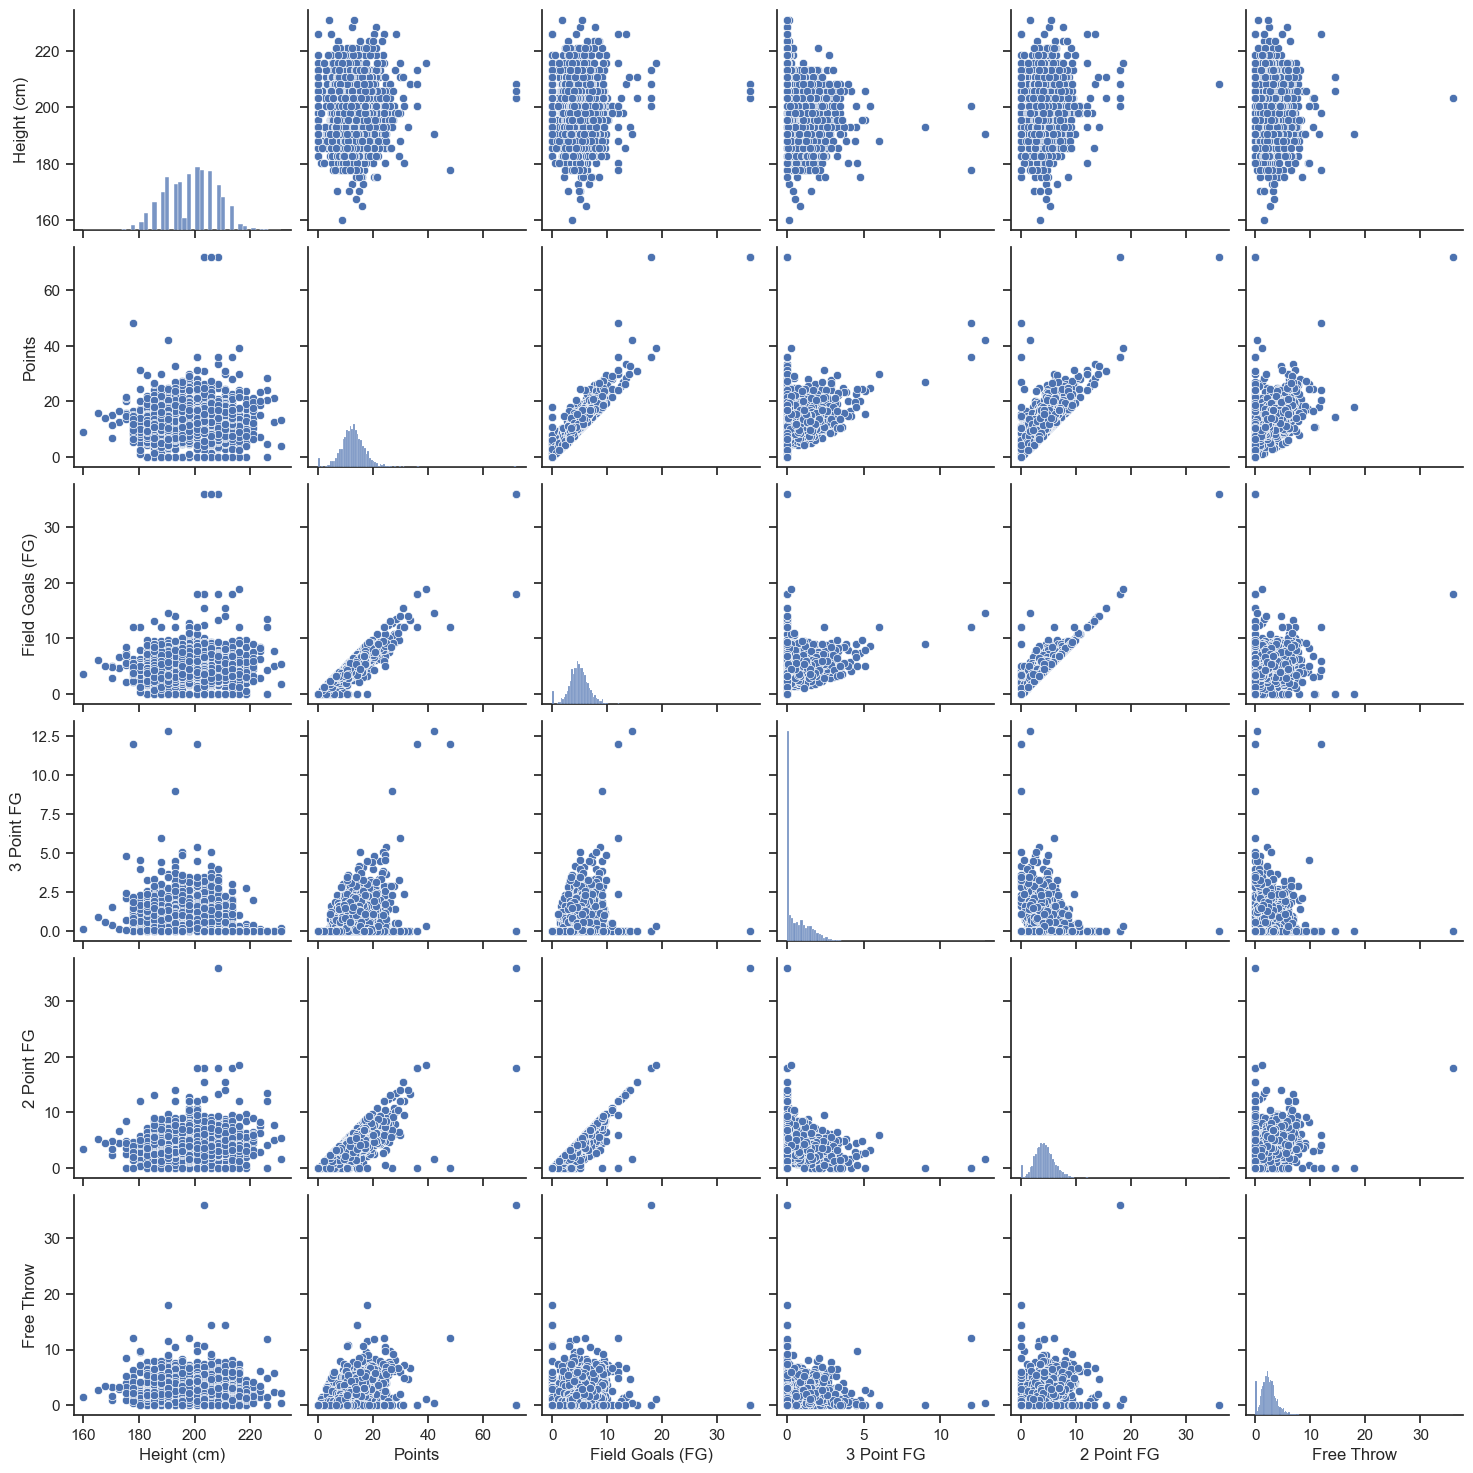

In [ ]:
player_performance_means = players_by_id[["height", "pts", "fg", "fg3", "fg2", "ft"]].mean()

import seaborn as sns

sns.set_theme(style="ticks")
labels = ["Height (cm)", "Points", "Field Goals (FG)", "3 Point FG", "2 Point FG", "Free Throw"]
pp = sns.pairplot(player_performance_means)
pp.x_vars = labels
pp.y_vars = labels
pp._add_axis_labels()

As we can see, there is no clear trend of correlation for almost any pair of the variables. Only 2 Point FG and FG seem to be somewhat correlated. This makes sense, as field goals contain all goals scored on any shot or tap (except for free throw) worth two or three points. 

We also wanted to display performace metrics of a chosen player in one plot. For this, we chose a random player (not completely random, as we avoided players with a lot of NaN inputs). With plotly libray we ploted the percentages of the same metrics mentioned above, as well as points aquired in each season in a group barchart. 
While searching for a representative player, we noticed that some players have multiple inputs (rows) for the same season with different values of the same performance metrics. We are not sure if this is a mistake in the dataset, but certainly for many applications we should decide what to do with it (take the mean value per season for each metric/choose only one of the multiple rows per season). 

In [ ]:
player_performance = players_by_id.get_group(44)
player_performance = player_performance.loc[:,["fgp", "fg3p", "fg2p", "ftp", "season", "pts"]]
player_performance.iloc[:, 0:4] = player_performance.iloc[:, 0:4]*100
player_performance = pd.melt(player_performance, id_vars="season", var_name="metric")
#players_by_id.get_group(44)["name"].unique()

In [ ]:
import plotly.express as px
df = px.data.tips()
fig = px.bar(player_performance, x="metric", y="value",
             color='season', barmode='group',
             title="Performance metrics for player LaMarcus Aldridge per season",
             labels={"value": "Value (%) / Number of Points"})
fig.update_layout(yaxis=dict(range=[0,100]), xaxis=dict(tickmode = 'array', tickvals = ["fgp", "fg3p", "fg2p", "ftp", "pts"], ticktext=["Field Goals (FG)", "3 point FG", "2 point FG", "Free Throws", "Points"]))
fig.show()

For this player, we can see how the 3 point field goal success grew over time (ignoring the 2015-16 season with no hits), as well as the success of free throws. This is then also more or less reflected in the number of points per season. 
In the plot the colors of the barcharts are duplicated for some seasons. In this case, it is not a problem, as seasons are ordered chronologiocally and it is clear to read out the seasons nonetheless. Also, the idea is to show the comparison/trend across the seasons, so if they are ordered, the color doesn't really make a difference. 
A nice feature of the plotly package is the interactivity, i.e., we can read out all information about each barchart when we put our mouse over it. This is great for the person doing the exploratory analysis (not as much for the audiance later, as they mostly see the plot later in a "static" state on a presentation for example), especially in more complex plots.  

### Aggregated teams

For the DataFrameGroupBy object for teams, we decided to choose one random season and select 3 best and 3 worst teams based on the sum of points per game (per player) and display the comparison of some performance metrics on a parallel coordinates plot. We chose one season, as otherwise the trends/effects "get lost" when calculating the mean of all seasons or summing up the metrics over all seasons. To accentuate the separation into 3 best and 3 worst teams, we chose 3 green and 3 red sequential colors. A lot of packages offer divergeing color palettes (green to red sequential color crossing), e.g., this is automatically implemented in plotly, but for this visualisation we decided to use pandas plotting (based on matplotlib).  

In [ ]:
players_merged_ss = players_merged[players_merged["season"].isin(["2016-17"])]
players_by_team_ss = players_merged_ss.groupby('current_team_id')

team_performace_sums = players_by_team_ss[["pts", "fg", "fg3", "fg2", "ft", "ast", "blk"]].sum() # summing up the number of different filed goals, points per game, assists and blocked shots
# mapping current_team_id from df players_merged with team_name from df teams by team_id 
team_performace_sums['team_name'] = team_performace_sums.index.map(team_id_to_name_mapping) # since the "old" dictionary is used for mapping, the retired group still has NaN as team name; we want to drop that data
team_performace_sums = team_performace_sums.dropna(subset=["team_name"])
team_performace_sums = team_performace_sums.sort_values(by=['pts'], ascending=False) # ordering dataframe by points per team

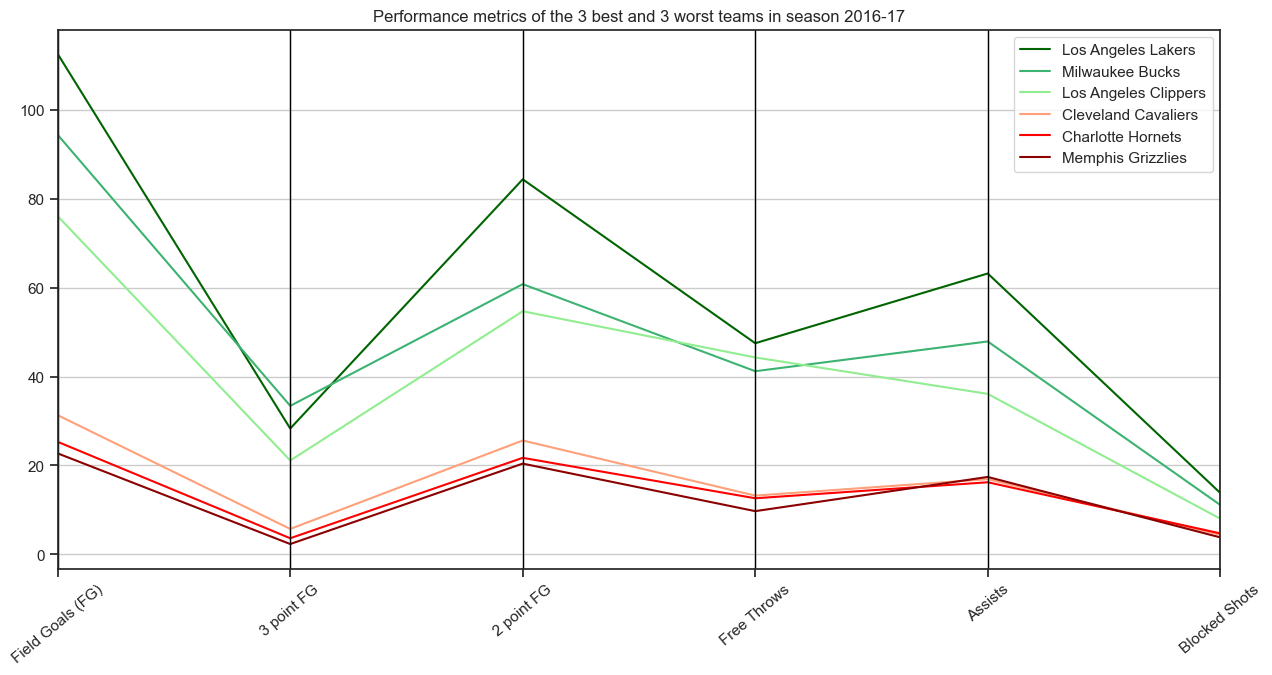

In [ ]:
# Selecting 3 best (first) and 3 worse (last) teams
head = team_performace_sums.head(3)
tail = team_performace_sums.tail(3)
team_plot_df = head._append(tail)

import matplotlib.pyplot as plt

plt.figure(figsize=(15,7))
pd.plotting.parallel_coordinates(team_plot_df, class_column="team_name", cols=["fg", "fg3", "fg2", "ft", "ast", "blk"], 
                                 color=["darkgreen", "mediumseagreen", "lightgreen", "lightsalmon", "red", "darkred"])
plt.xticks(ticks=range(0, 6), labels=["Field Goals (FG)", "3 point FG", "2 point FG", "Free Throws", "Assists", "Blocked Shots"], rotation=40)
plt.title(label="Performance metrics of the 3 best and 3 worst teams in season 2016-17")
plt.show()

The chosen team colors make the plot very easy to understand/read. In this case, the values of all variables are similar enough, so there is no need for different scaling of the axes. 

In [ ]:
# Converting DataFrameGroupBy objects to csv is not possible, so we will iterate through easc group and make a new dataframe

# function adding a key value column to each group DataFrame
def add_group_column(group_df, group_name):
    group_df['group'] = group_name
    return group_df

# Apply the function to each group and concatenate the resulting DataFrames
result_df_players = pd.concat([add_group_column(group_df, group_name) for group_name, group_df in players_by_id], ignore_index=True)
result_df_teams = pd.concat([add_group_column(group_df, group_name) for group_name, group_df in players_by_team], ignore_index=True)

# Save the resulting DataFrame to a CSV file
result_df_players.to_csv('players_by_id_table.csv', index=False)
result_df_teams.to_csv('players_by_team_table.csv', index=False)

# Save other DataFrames to CSV files
players_merged.to_csv('players_merged.csv', index=False)
players_data.to_csv('players_data.csv', index=False)